# Машинное обучение
## Домашнее задание №1: KNN + Линейные модели

**Срок сдачи:** 5 марта 2023, 23:59

**Максимально баллов:** 10

**Штраф за опоздание:** по 2 балла за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла. Формат сдачи будет указан чуть позже.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 баллов

При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность.

## KNN (5 баллов)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой.
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [31]:
from scipy.spatial import distance
from sklearn.neighbors import KDTree
from collections import Counter

In [32]:
class MyKNeighborsClassifier(BaseEstimator):

    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(X)

    def predict(self, X):
        predicts = []
        if self.algorithm == 'brute':
            dists = distance.cdist(X, self.X, self.metric)
            nearest_neighbors_ind = np.argsort(dists, axis=1)[:, :self.n_neighbors]

        elif self.algorithm == 'kd_tree':
            nearest_neighbors_ind = self.tree.query(X, k=self.n_neighbors, return_distance=False)

        for ind in nearest_neighbors_ind:
            k_labels = self.y[ind]
            label_counter = Counter(k_labels)
            predicts.append(label_counter.most_common(1)[0][0])
        return np.array(predicts)


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [105]:
iris = datasets.load_iris()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [107]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [108]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [109]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза.
Для этого используем numpy.

In [110]:
%timeit clf.fit(X_train, y_train)

388 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [111]:
%timeit my_clf.fit(X_train, y_train)

295 ns ± 7.81 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [112]:
%timeit clf.predict(X_test)

4.42 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [113]:
%timeit my_clf.predict(X_test)

191 µs ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза.
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn.

In [114]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [115]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [116]:
%time clf.fit(X_train, y_train)

CPU times: user 1.69 ms, sys: 0 ns, total: 1.69 ms
Wall time: 3.17 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [117]:
%time my_clf.fit(X_train, y_train)

CPU times: user 540 µs, sys: 0 ns, total: 540 µs
Wall time: 551 µs


In [118]:
%time clf.predict(X_test)

CPU times: user 4.31 ms, sys: 3 µs, total: 4.31 ms
Wall time: 5.52 ms


array([2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [119]:
%time my_clf.predict(X_test)

CPU times: user 735 µs, sys: 0 ns, total: 735 µs
Wall time: 733 µs


array([2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [120]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [121]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [122]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
vectorizer = CountVectorizer(max_features=100, stop_words='english')
X_vect = vectorizer.fit_transform(data).toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [125]:
from sklearn.model_selection import cross_val_score

In [134]:
model = MyKNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(model, X_vect, target, cv=3, scoring='accuracy')
print("Cross validation scores:\n\t", "\n", *cv_scores, "\n")
print(f"Mean CV Accuracy = {np.mean(cv_scores):.2f}")

Cross validation scores:
	 
 0.16967126193001061 0.16070007955449483 0.17952797666401485 

Mean CV Accuracy = 0.17


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [136]:
def optimal_n_neighbors(X, y):
    neighbors_dict = {}
    for n_neighbors in range(1, 11):
        model = MyKNeighborsClassifier(n_neighbors)
        cv_scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
        neighbors_dict[n_neighbors] = np.mean(cv_scores)

    max_value = max(neighbors_dict.values())
    optimal_n = max(neighbors_dict, key=neighbors_dict.get)

    return neighbors_dict, optimal_n, max_value

In [137]:
neighbors_dict, optimal_n, max_value = optimal_n_neighbors(X_vect, target)
print(f'Optimal number of neighbors: {optimal_n}, Accuracy {max_value}')

Optimal number of neighbors: 10, Accuracy 0.17765642600564913


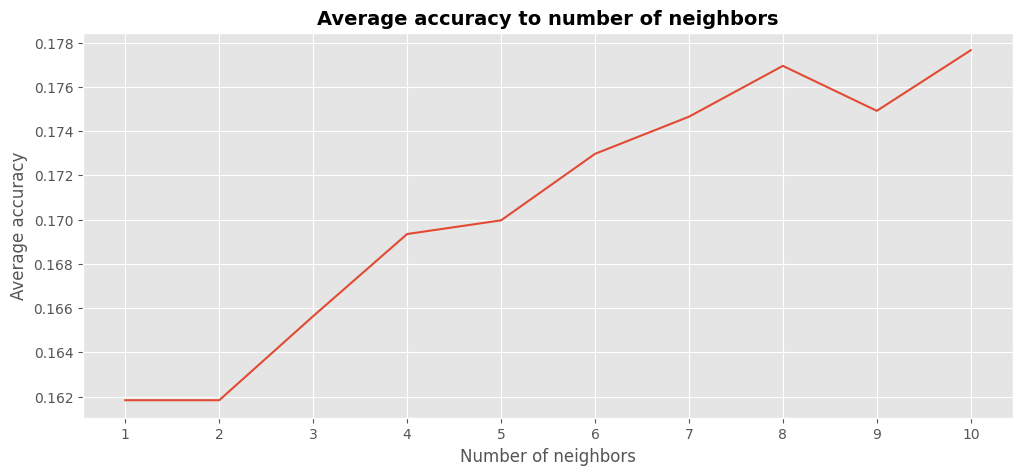

In [138]:
plt.title('Average accuracy to number of neighbors', fontsize=14, weight="heavy")
plt.ylabel('Average accuracy')
plt.xlabel('Number of neighbors')
plt.xticks(list(neighbors_dict.keys()))
plt.plot(neighbors_dict.keys(),neighbors_dict.values());
plt.grid(True)
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

1. Используем косинусную метрику вместо евклидовой.

In [139]:
cv_scores = cross_val_score(MyKNeighborsClassifier(n_neighbors=10, metric='cosine'), X_vect, target, cv=3, scoring='accuracy')
print("Cross validation scores:\n\t", "\n", *cv_scores, "\n")
print(f"Mean CV Accuracy = {np.mean(cv_scores):.2f}")

Cross validation scores:
	 
 0.20413573700954402 0.19596923892866613 0.21479713603818615 

Mean CV Accuracy = 0.20


2. К текстам применяется TfIdf векторизация.

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [141]:
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_tfidfVect = tfidf_vectorizer.fit_transform(data).toarray()

In [142]:
cv_scores = cross_val_score(MyKNeighborsClassifier(n_neighbors=10), X_tfidfVect, target, cv=3, scoring='accuracy')
print("Cross validation scores:\n\t", "\n", *cv_scores, "\n")
print(f"Mean CV Accuracy = {np.mean(cv_scores):.2f}")

Cross validation scores:
	 
 0.20811240721102864 0.20551577830814108 0.21426677273932643 

Mean CV Accuracy = 0.21


__Ответ__: Модель, использующая TfIdf векторизацию и количество соседей = 10 - лучшая.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [143]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [145]:
data_test = newsgroups['data']
target_test = newsgroups['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [146]:
X_test_tfidfVect = tfidf_vectorizer.transform(data_test).toarray()

In [147]:
my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute')
my_clf.fit(X_tfidfVect, target)
my_clf_pred = my_clf.predict(X_test_tfidfVect)

In [148]:
accuracy = accuracy_score(target_test, my_clf_pred)
print("Accuracy score on test:", accuracy)

Accuracy score on test: 0.18813064259160914


__Ответ__: Качество на тесте отличается от кросс-валидационного при тех же параметрах векторизации и числа соседей. На тесте Accurace в среднем на 0.03 ниже чем на кросс-валидации. Обучающий и тестовый наборы данных могли иметь различное распределение, кроме того vectorizer был обучен на тренировочной выборке.

# Линейные модели (5 баллов)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

### Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической:
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно.

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается.
* Правило останова - максимальное количество эпох
    

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array.





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены.

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***.

Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    size = y.shape[0]
    indxs = np.arange(size)

    if shuffle:
        np.random.shuffle(indxs)

    for start in range(0, size, batch_size):
        end = min(start + batch_size, size)
        batch_indices = indxs[start:end]
        X_batch = np.hstack((np.ones((len(batch_indices), 1)), X[batch_indices]))
        y_batch = y[batch_indices]

        yield (X_batch, y_batch)

In [ ]:
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [11]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, batch_size=1, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}
        self.model_type = model_type
        self.batch_size = batch_size

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        y_pred = np.dot(X_batch, self.weights)
        if self.model_type == 'lin_reg':
            loss = np.sum((y_pred - y_batch) ** 2) / y_batch.shape[0]
        elif self.model_type == 'log_reg':
            loss = -np.sum(y_batch * np.log(sigmoid(y_pred)) + (1 - y_batch) * np.log(1 - sigmoid(y_pred))) / y_batch.shape[0]
        loss += np.sum(self.weights[1:] ** 2) / self.C
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        y_pred = np.dot(X_batch, self.weights)
        if self.model_type == 'lin_reg':
            loss_grad = 2 * np.dot(X_batch.T, (y_pred - y_batch)) / y_batch.shape[0]
        elif self.model_type == 'log_reg':
            loss_grad = np.dot(X_batch.T, (sigmoid(y_pred) - y_batch)) / y_batch.shape[0]
        loss_grad[1:] += (2 / self.C) * self.weights[1:]
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        self.weights = np.random.randn(X.shape[1] + 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X_bias, self.weights)
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(np.dot(X_bias, self.weights))
            y_hat = y_hat >= 0.5
        return y_hat

Запустите обе регрессии на синтетических данных.


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [21]:
def plot_decision_boundary(clf):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(np.min(X[:,0]) - 1, np.max(X[:,0]) + 1, 500)
    y = np.linspace(np.min(X[:,1]) - 1, np.max(X[:,1]) + 1, 500)
    X_, Y_ = np.meshgrid(x, y)

    xy = np.vstack([X_.ravel(), Y_.ravel()]).T
    P = clf.predict(xy).reshape(X_.shape)

    ax.contour(X_, Y_, P, colors='k', levels=np.linspace(P.min(), P.max(), 3), alpha=0.5)

    plt.scatter(X[:,0], X[:,1], c=np.r_[np.ones(200), np.zeros(200)])


Linear Regression Model Weights: [ 0.05708013  0.07017739 -0.07680708]
Logistic Regression Model Weights: [-4.31328739  1.01047649 -1.12356939]


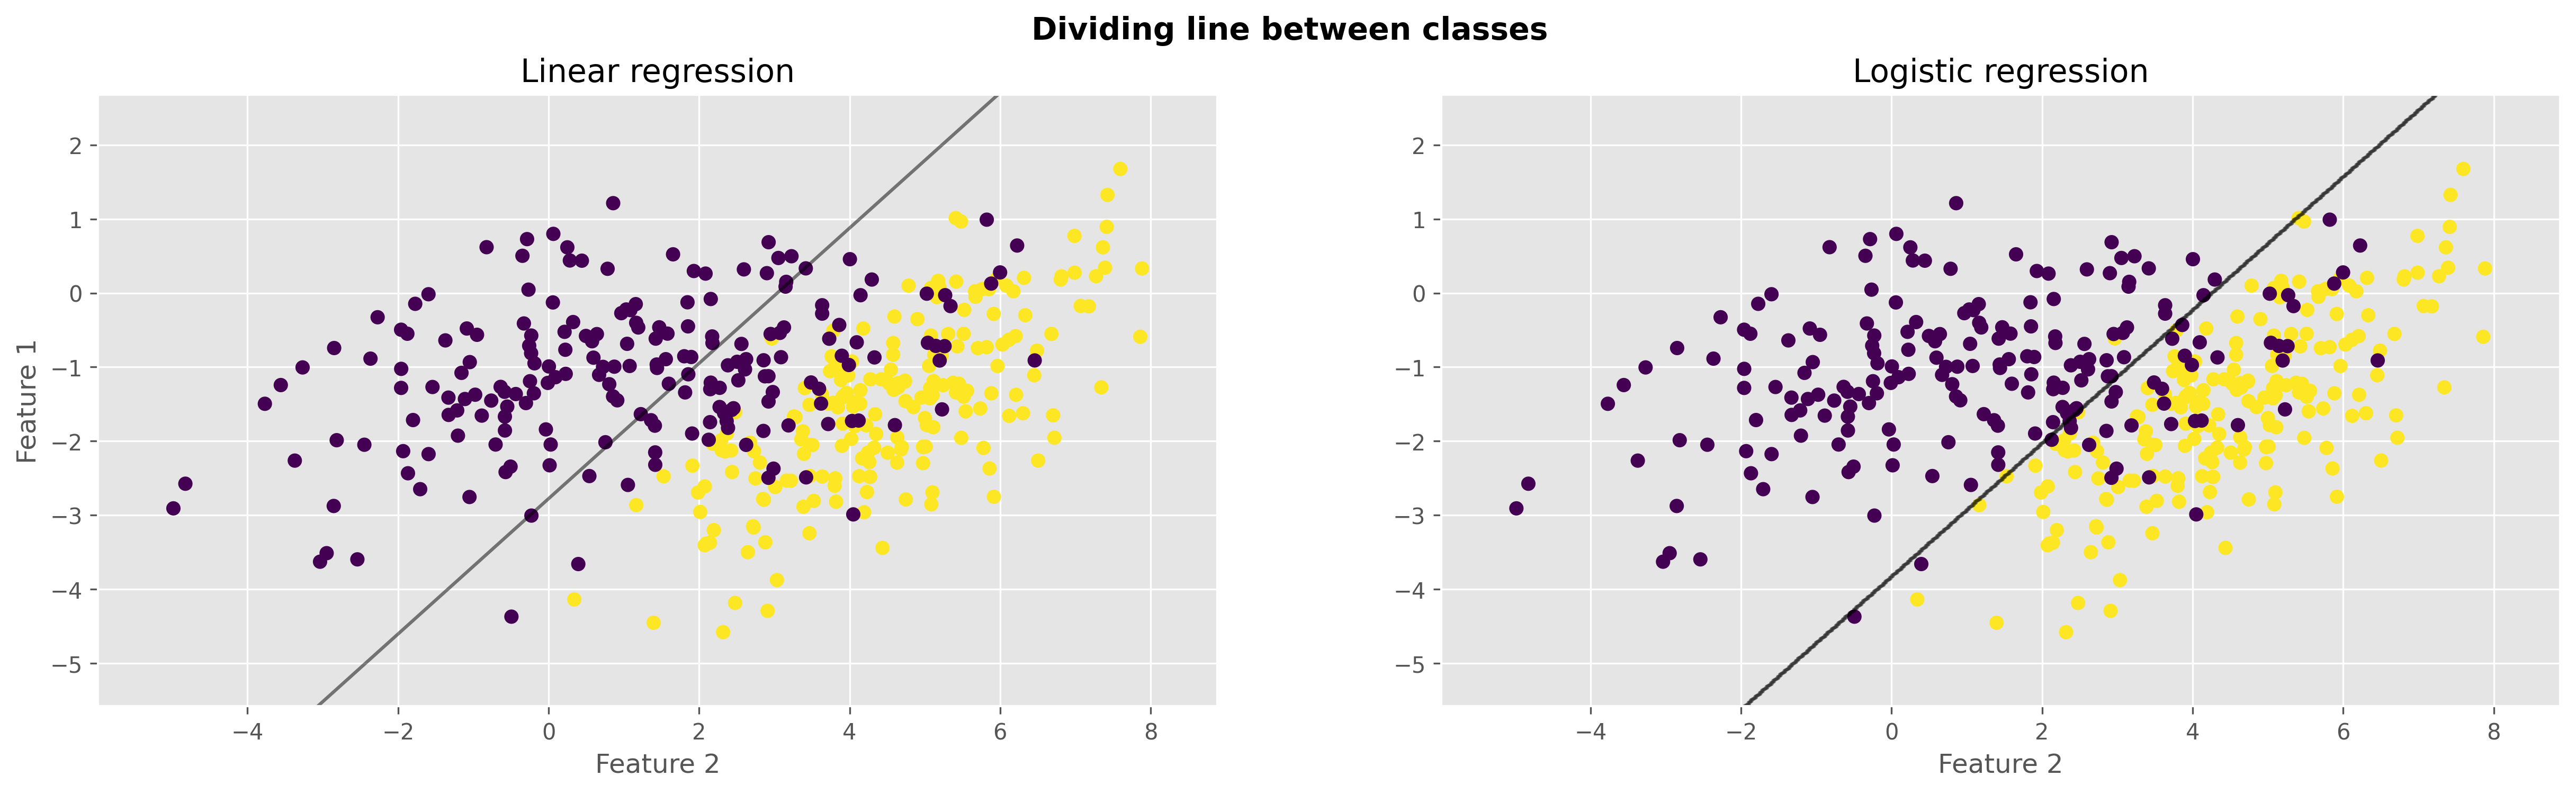

In [25]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]


lin_reg_clf = MySGDClassifier(batch_generator, model_type='lin_reg')
log_reg_clf = MySGDClassifier(batch_generator, model_type='log_reg', C=100, alpha=0.03)

lin_reg_clf.fit(X, y)
log_reg_clf.fit(X, y)

plt.figure(figsize=(20, 5), dpi=300)
plt.suptitle('Dividing line between classes', fontsize=14, weight="heavy")

print("Linear Regression Model Weights:", lin_reg_clf.weights)
plt.subplot(1, 2, 1)
plt.title('Linear regression')
plot_decision_boundary(lin_reg_clf)
plt.ylabel('Feature 1')
plt.xlabel('Feature 2')

print("Logistic Regression Model Weights:", log_reg_clf.weights)
plt.subplot(1, 2, 2)
plt.title('Logistic regression')
plot_decision_boundary(log_reg_clf)
plt.ylabel(None)
plt.xlabel('Feature 2')

plt.show()


# from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
# lin_reg = Ridge(alpha=0.01)
# log_reg = LogisticRegression()
# lin_reg.fit(X, y)
# log_reg.fit(X, y)
# plot_decision_boundary(lin_reg)
# plot_decision_boundary(log_reg)

Далее будем анализировать Ваш алгоритм.
Для этих заданий используйте датасет ниже.

In [33]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике.

$N$ можно брать 10, 50, 100 и т.д.

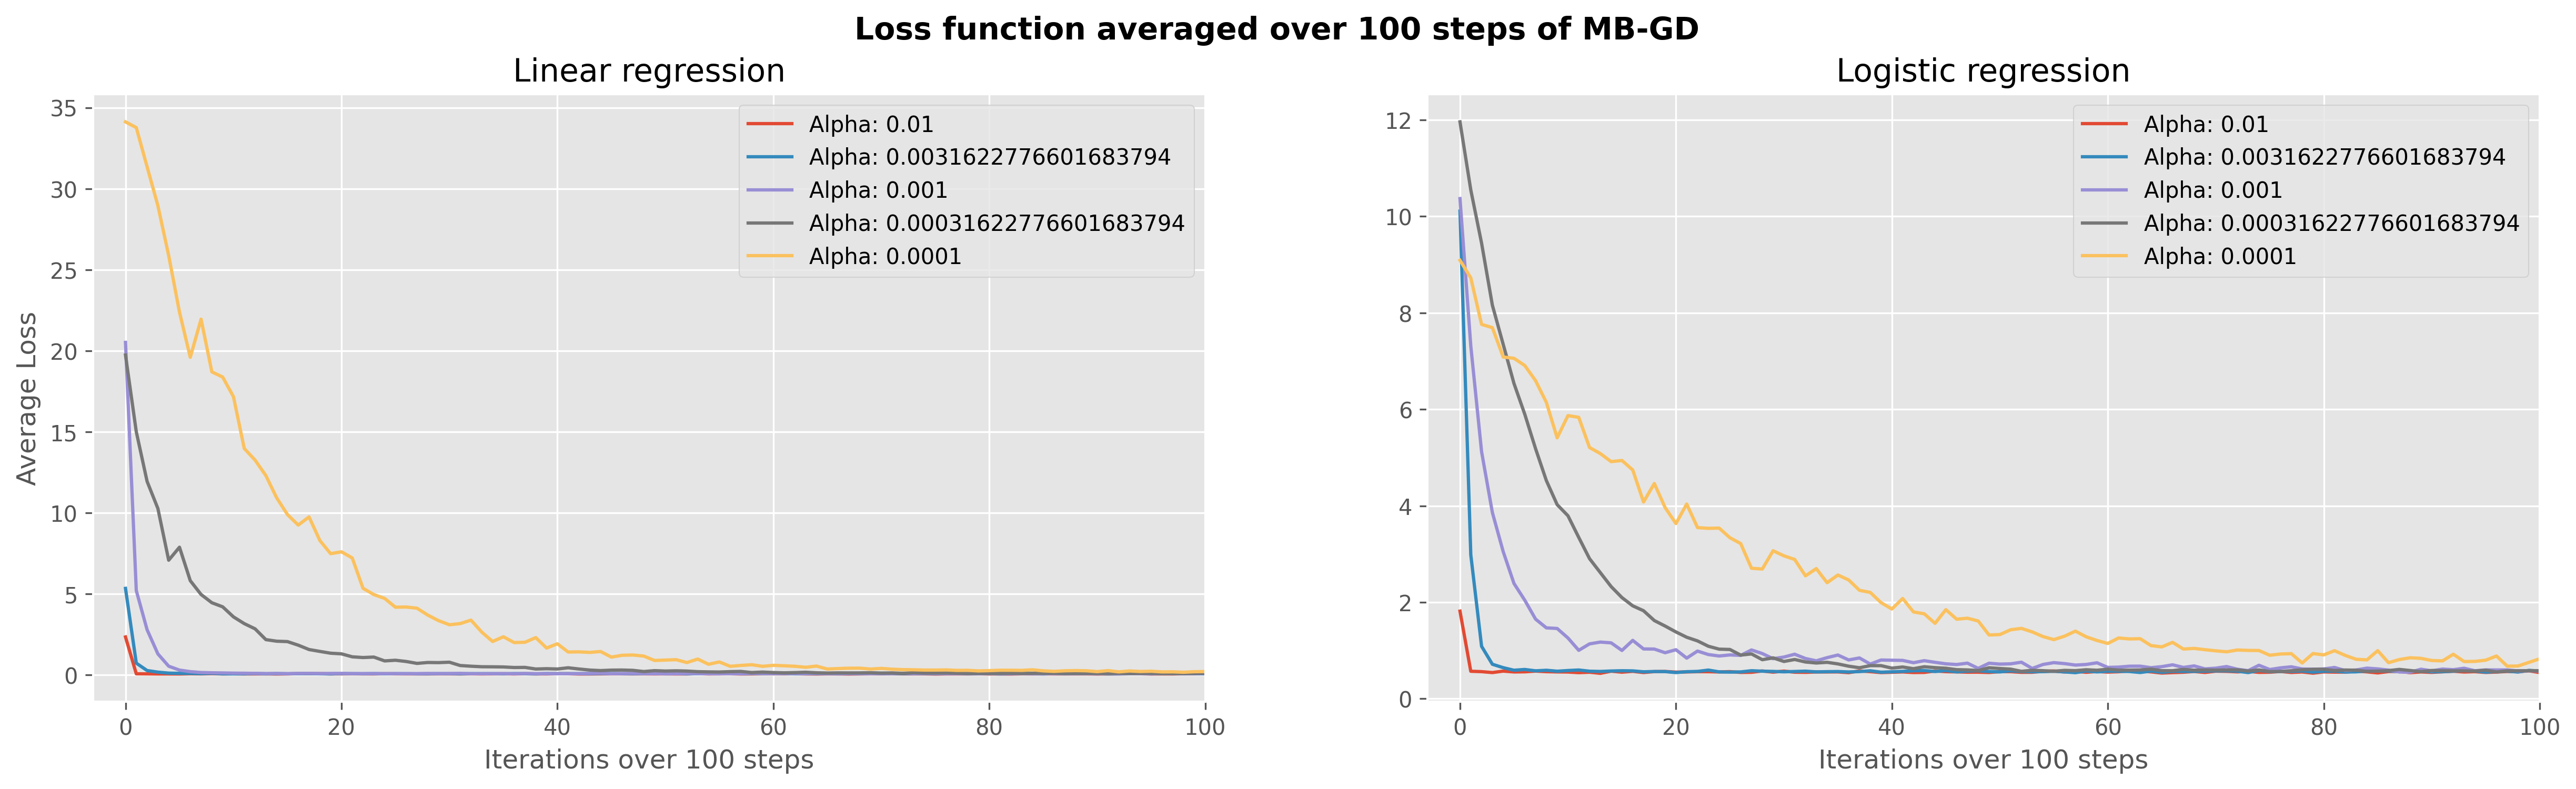

In [34]:
def plot_errors_log(X, y, alphas, N, model_type='lin_reg'):
    for alpha_val in alphas:
        model = MySGDClassifier(batch_generator, batch_size=512, alpha=alpha_val, model_type=model_type)
        model.fit(X, y)

        errors_dict = model.errors_log
        iterations = np.array(errors_dict['iter'])
        losses = np.array(errors_dict['loss'])

        num_groups = len(iterations) // N
        grouped_losses = np.mean(losses[:num_groups*N].reshape(-1, N), axis=1)
        grouped_iteration_numbers = np.arange(num_groups)
        plt.plot(grouped_iteration_numbers, grouped_losses, label=f'Alpha: {alpha_val}')


N = 100
alphas = np.logspace(-2, -4, 5)

plt.figure(figsize=(20, 5), dpi=300)
plt.suptitle(f'Loss function averaged over {N} steps of MB-GD', fontsize=14, weight="heavy")

plt.subplot(1, 2, 1)
plt.title('Linear regression')
plot_errors_log(X, y, alphas, N, model_type='lin_reg')
plt.xlim(-3, 100)
plt.ylabel('Average Loss')
plt.xlabel(f'Iterations over {N} steps')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Logistic regression')
plot_errors_log(X, y, alphas, N, model_type='log_reg')
plt.xlim(-3, 100)
plt.ylabel(None)
plt.xlabel(f'Iterations over {N} steps')
plt.legend()

plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)`

__Ответ__: при alpha близких к 0.01 скорость сходимости намного больше, чем при alpha близких к 0.001. Для лучшей сходимости стоит выбрать alpha = 0.01

In [ ]:
def plot_weights(X, y, C_array, model_type='lin_reg'):
    mean_weights = []
    for C_val in C_array:
        model = MySGDClassifier(batch_generator, batch_size=512, C=C_val, model_type=model_type)
        model.fit(X, y)
        mean_weight = np.mean(abs(model.weights))
        mean_weights.append(mean_weight)
    plt.plot(C_array, mean_weights)

C_array = np.logspace(3, -3, 10)

plt.figure(figsize=(20, 5), dpi=300)
plt.suptitle(f'Average weights of regularization coefficient', fontsize=14, weight="heavy")

plt.subplot(1, 2, 1)
plt.title('Linear regression')
plot_weights(X, y, C_array, model_type='lin_reg')
plt.xscale('log')
plt.ylabel('Absolute average weights')
plt.xlabel("Regularization coefficient")


plt.subplot(1, 2, 2)
plt.title('Logistic regression')
plot_weights(X, y, C_array, model_type='log_reg')
plt.xscale('log')
plt.ylabel(None)
plt.xlabel("Regularization coefficient")


plt.show()


Довольны ли Вы, насколько сильно уменьшились Ваши веса?